In [1]:
import os

os.chdir(r"D:\NanoDiamond\PulseSequencer")

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from IPython.display import display

from Interfaces.dataSaver import dataSaver

from Data.pulseConfiguration import pulseConfiguration
from Data.microwaveConfiguration import microwaveConfiguration
from Data.measurementType import measurementType

from LogicManagers.measurementManager import measurementManager
from LogicManagers.scanManager import scanManager
from LogicManagers import pulseAnalayzer

from time import sleep

In [2]:
Iterations = 100000

pulseConfig = pulseConfiguration()

pulseConfig.count_duration = 1
pulseConfig.samples_number = 1024
pulseConfig.threshold = 1.6
pulseConfig.iterations = Iterations
pulseConfig.pump_start = 0
pulseConfig.pump_duration = 4
pulseConfig.microwave_start = 5
pulseConfig.microwave_duration = 1
pulseConfig.image_start = 8
pulseConfig.image_duration = 4
pulseConfig.readout_start = 0
pulseConfig.low_voltage_AOM = 0
pulseConfig.high_voltage_AOM = 0.9
pulseConfig.measurement_type = measurementType.RabiPulse

microwaveConfig = microwaveConfiguration(
    trigMode = 0,
    centerFreq=2896,
    power=0)

In [3]:
measurement_manager = measurementManager()
measurement_manager.connectToEverything()

scan_manager = scanManager(measurement_manager)

The IP address of rp-f09ded.local is 132.72.13.15
Connecting to red pitaya: 132.72.13.15 1001
connected to pulse blaster
WindFreak is connected


AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.0 18011.080000000005
AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.05 18050.454356127295
AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.1 17975.27812530842
AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent:

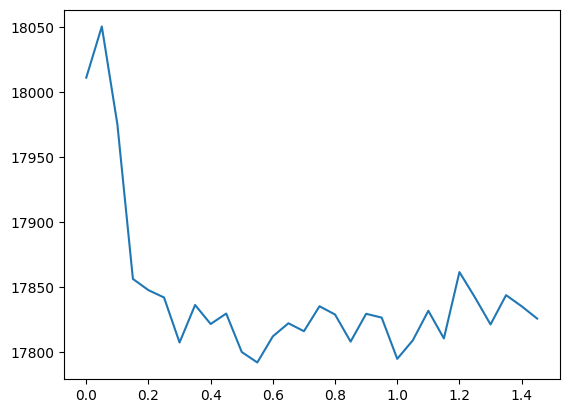

In [4]:
for d,t in scan_manager.startScan(pulseConfig, microwaveConfig, 0, 1.5, 0.05):
    print(t, d)

plt.plot(scan_manager.extractedData.keys(), scan_manager.extractedData.values())
plt.show()